In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt
from collections import Counter

from scipy.stats import chi2_contingency

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),[r'{0,0.5}$\rightarrow${1}',r'{0,0.5}$\nrightarrow${1}'],fontsize=18)
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label,fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")
    
#-------------------------------------------------------------------------------------
def draw_bar(p_data,p_title):
    fz=20
    params = {'figure.figsize': '8, 6'}
    plt.rcParams.update(params)
    width=0.3

    colors=['#d5695d','#5d8ca8','green','purple']

    different_elements_keys=np.unique(p_data)
    keys_values = Counter(p_data)
    total_counts=np.sum([*keys_values.values()])
    total_index=np.arange(len(different_elements_keys))
    for i in total_index:
        different_elements_keys_i=different_elements_keys[i]
        rects_1=plt.bar(i,keys_values[different_elements_keys_i]/total_counts,width,color=colors[i])

    plt.xticks(total_index,different_elements_keys,fontsize=fz)
    plt.yticks(np.arange(0,1,0.2),fontsize=fz)
    plt.ylim(0,1)
    plt.title(p_title)
    plt.show()

In [3]:
def mean_bar(data_1_,data_2_,ylabel):
    
    data_1=np.around(data_1_,3)
    data_2=np.around(data_2_,3)
    fz=18
    params = {'figure.figsize': '8, 6'}
    plt.rcParams.update(params)

    labels=[r'{0,0.5}$\rightarrow${1}',r'{0,0.5}$\nrightarrow${1}']

    width=0.3
    rects_1=plt.bar(2,data_1,width,label=labels[0],color='#d5695d')
    height = rects_1[0].get_height()
    plt.text(rects_1[0].get_x() + rects_1[0].get_width() / 2, height, str(height), size=fz-3, ha='center', va='bottom')

    rects_2=plt.bar(3,data_2,width,label=labels[1],color='#5d8ca8')

    height = rects_2[0].get_height()
    plt.text(rects_2[0].get_x() + rects_2[0].get_width() / 2, height, str(height), size=fz-3, ha='center', va='bottom')

    plt.title('')
    plt.xlim(1.2,3.8)    
    plt.xticks(range(2,4),[r'{0,0.5}$\rightarrow${1}',r'{0,0.5}$\nrightarrow${1}'],fontsize=fz)
    
    plt.yticks(fontsize=fz)
    plt.xlabel('')
    plt.ylabel(ylabel,fontsize=fz)
    plt.show()

In [4]:
def chi_test(group1_data_,group2_data_):
    result_1 = Counter(group1_data_)
    result_2 = Counter(group2_data_)

    all_keys=set(result_1.keys()) | set(result_2.keys())

    result_1_new={}
    result_2_new={}

    for key_i in all_keys:
        if key_i in result_1.keys():
            result_1_new[key_i]=result_1[key_i]
        else:
            result_1_new[key_i]=0
        
        if key_i in result_2.keys():
            result_2_new[key_i]=result_2[key_i]
        else:
            result_2_new[key_i]=0
        
    obs=np.transpose(np.array([list(result_1_new.values()),list(result_2_new.values())]))

    chi2, p_value,dot,expected=chi2_contingency(observed=obs)

    print("\n")
    print("Chi-square test")
    print("Chi2:",chi2)
    print("p value:",p_value)
    print("_"*50)
    print("\n")

In [5]:
data,data_arr,column_names=csv_read('./data/survival_data_filtered_3.csv')
column_names_arr=np.array(column_names)

FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

['NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCFADM', 'NACCFFTD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'DECSUB', 'DECIN', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGOTHR', 'NACCCOGF', 'COGMODE', 'DECAGE', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'NACCBEHF', 'BEMODE', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'COURSE', 'FRSTCHG', 'NORMCOG', 'DEMENTED', 'NACCPPA', 'NACCBVFT', 'NACCLBDS', 'NACCTMCI', 'NACCMCIL', 'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'NACCMCII', 'IMPNOMCI', 'NACCALZD', 'NACCALZP', 'NACCLBDE', 'NACCLBDP', 'PARK', 'PSP', 'PSPIF', 'CORT', 'CORTIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'HYCEPH', 'HYCEPHIF', 'NEOP', 'NEOPIF', 'DEP', 'DEPIF', 'OTHPSY', 'OTHPSYIF',

In [6]:
used_number_features=10
FS_data_used=FS_data_arr[-1,0:used_number_features]

Feature:  NACCAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.18644209663356712, pvalue=0.6661730722881143)
Test: f_t, p_value_t -1.707E+00 8.882E-02
ANOVA: f, p_value: 2.913E+00 8.882E-02
--------------------------------------------------------------------------------




Chi-square test
Chi2: 45.057825978262194
p value: 0.5116523829153664
__________________________________________________


Group1:  [79 70 64 78 86 76 68 88 78 105 82 53 84 70 74 94 78 76 85 76 75 67 71 78
 66 89 94 83 75 72 71 77 84 95 75 87 93 94 62 89 66 85 94 71 96 60 80 62
 87 75 54 85 80 97 75 84 85 92 86 93 90 78 65 64 60 85 82 67 76 88 86 84
 96 84 95 83 84 82 90 95 87 79 83 80 82 61 70 83 81 81 85 78 84 80 75 55
 86 67 87 78 79 84 67 81 81 94 77 82 88 89 86 73 85 84 82 73 76 66 91 89
 77 77 74 80 69 82 81 86 86 96 75 78 88 86 93 76 81 68 85 90 84 67 89 77
 93 65 80 70 81 78 83 78 83 84 83 77 80 77 74 88 72 70 78 83 56 71 95 64
 97 90 87 

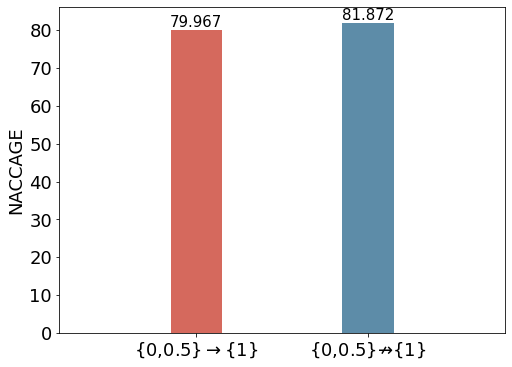

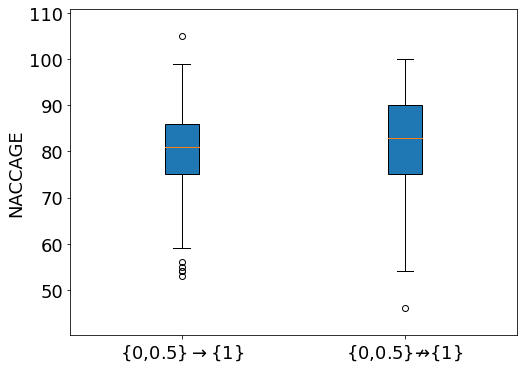

************************************************************************************************************************





Feature:  RACETER


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.1848280541752085, pvalue=0.2771600795631978)
Test: f_t, p_value_t 1.472E+00 1.419E-01
ANOVA: f, p_value: 2.167E+00 1.419E-01
--------------------------------------------------------------------------------




Chi-square test
Chi2: 2.8730073011400026
p value: 0.23775759076224717
__________________________________________________


Group1:  [88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 99 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 8

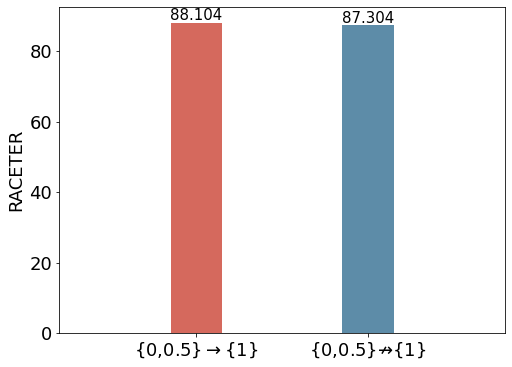

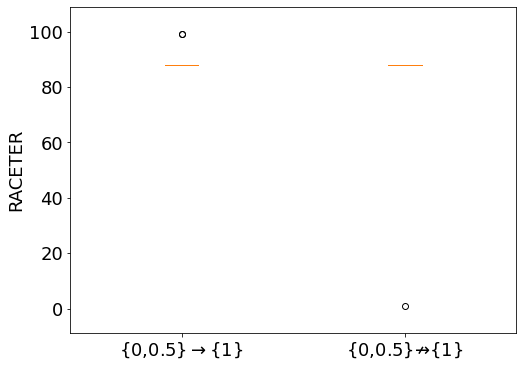

************************************************************************************************************************





Feature:  NACCIDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.8663639007546725, pvalue=0.3526361734661826)
Test: f_t, p_value_t 3.105E+00 2.065E-03
ANOVA: f, p_value: 9.641E+00 2.065E-03
--------------------------------------------------------------------------------




Chi-square test
Chi2: 103.29809113941887
p value: 3.707699372923993e-23
__________________________________________________


Group1:  [1 1 8 1 1 1 8 1 1 1 8 8 1 1 1 1 1 1 1 8 8 8 8 8 8 1 1 1 8 1 8 8 1 1 8 1 1
 1 8 1 8 1 1 1 1 8 1 8 8 8 1 1 1 8 8 8 1 8 1 1 1 1 1 8 8 8 1 8 1 1 1 1 1 8
 1 8 1 1 1 1 1 1 1 1 8 8 1 1 8 1 8 1 8 1 1 8 1 8 1 1 1 1 8 1 8 1 1 1 1 1 1
 8 1 1 1 8 8 1 1 8 1 1 8 1 8 1 1 1 8 1 1 8 1 1 1 1 8 1 1 1 1 8 1 1 8 1 1 8
 1 8 1 8 8 1 1 1 8 1 8 1 8 8 8 8 8 1 0 8 1 1 1 8 1 1 8 1 1 8 8 1 1 1 1 1 8
 8 1 8 1 8 1 1 1 1 

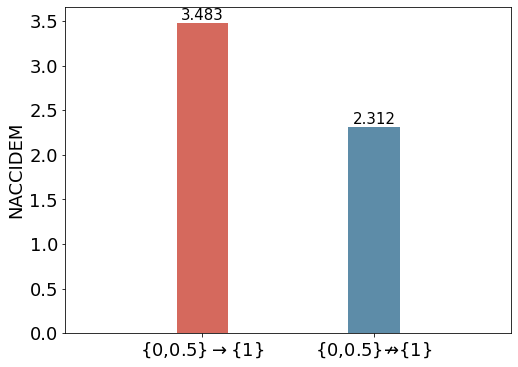

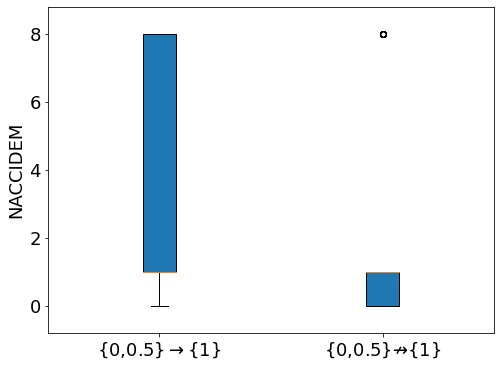

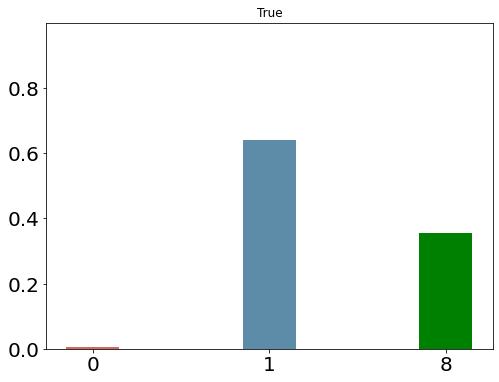

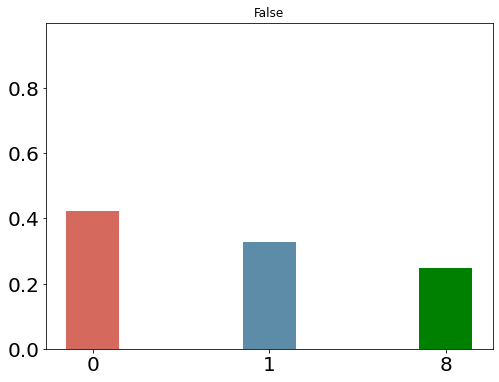

************************************************************************************************************************





Feature:  NACCAGEB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.8489608576217694, pvalue=0.35751151425058947)
Test: f_t, p_value_t -9.763E-01 3.296E-01
ANOVA: f, p_value: 9.532E-01 3.296E-01
--------------------------------------------------------------------------------




Chi-square test
Chi2: 40.3035212834471
p value: 0.670911185247281
__________________________________________________


Group1:  [77 68 61 76 81 75 66 79 73 97 81 50 82 63 70 85 74 74 81 75 71 66 69 75
 64 85 89 79 74 64 70 75 76 93 73 83 88 86 61 86 65 83 86 69 88 58 76 60
 85 74 53 78 77 94 73 81 83 86 78 88 81 69 64 62 59 83 76 67 73 86 78 83
 86 83 86 76 81 81 88 90 84 76 81 77 81 57 66 81 79 77 78 74 77 74 70 50
 82 65 80 71 73 80 66 76 78 93 74 80 78 82 75 72 81 79 75 72 75 65 82 87
 69 73 71 79 66 73 79 84 83 87 74

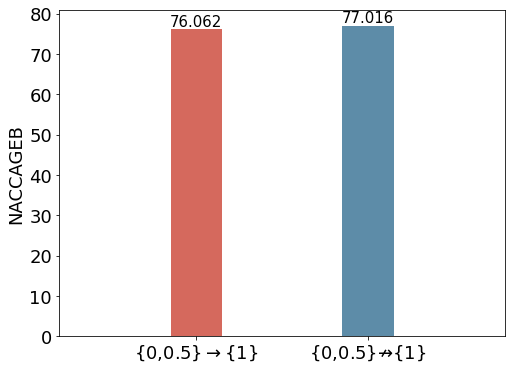

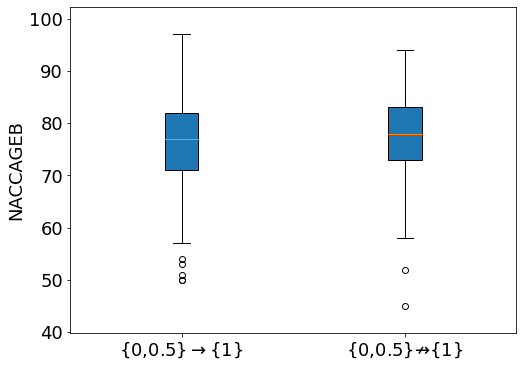

************************************************************************************************************************





Feature:  DECIN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.7678793623142695, pvalue=0.09711141913857642)
Test: f_t, p_value_t 1.036E-01 9.175E-01
ANOVA: f, p_value: 1.074E-02 9.175E-01
--------------------------------------------------------------------------------




Chi-square test
Chi2: 29.497716725602693
p value: 1.7600488080494484e-06
__________________________________________________


Group1:  [1 0 1 1 1 9 0 1 1 0 1 1 1 1 1 1 1 1 1 9 1 1 9 1 1 1 1 1 9 1 1 0 1 1 1 1 1
 1 9 1 1 1 1 1 0 1 1 1 9 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 9 1 9 0 1 1 1 1 1 1 1 1 9 9 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0

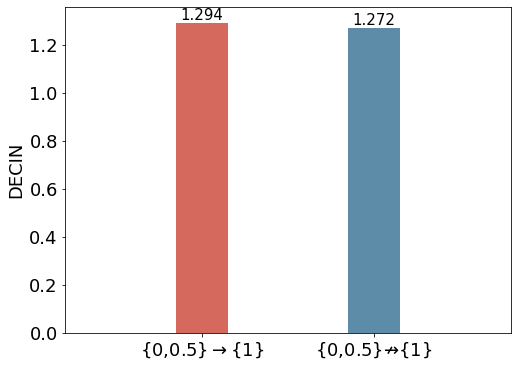

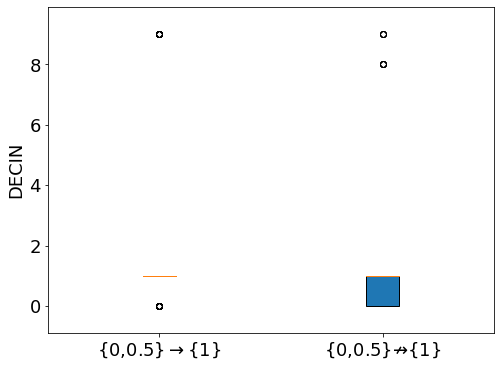

************************************************************************************************************************





Feature:  COMMUN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=8.947821092862739, pvalue=0.0029845582300037188)
Test: f_t, p_value_t 1.393E+01 9.325E-33
ANOVA: f, p_value: 2.040E+02 9.325E-33
--------------------------------------------------------------------------------




Chi-square test
Chi2: 185.45938979131645
p value: 5.0105154033311135e-39
__________________________________________________


Group1:  [1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 0.5 0.5 1.0 1.0
 1.0 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.5 1.0 0.5 1.0 1.0 2.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 0.5 1.0 2.0
 0.5 1.0 1.0 2.0 2.0 0.5 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0
 1.0 1.0 0.5 2.0 0.5 1.0 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 1.0 1.0 1.0 2.0
 1.0 1.0 0.5 1.0 1.0 1.0 0.5

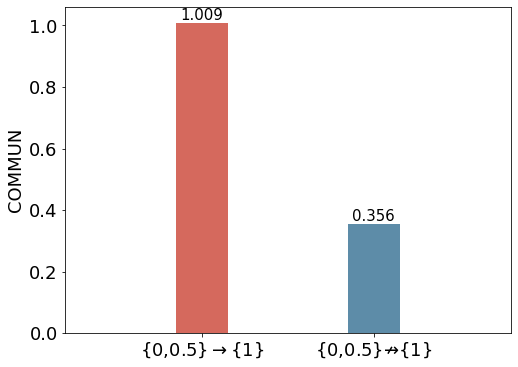

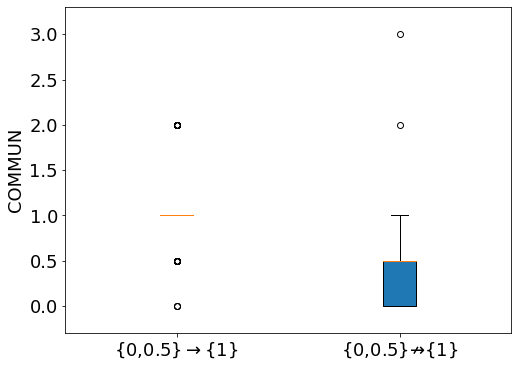

************************************************************************************************************************





Feature:  NPPDXE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.4278601965591255, pvalue=0.23296177459131154)
Test: f_t, p_value_t -1.195E+00 2.330E-01
ANOVA: f, p_value: 1.428E+00 2.330E-01
--------------------------------------------------------------------------------




Chi-square test
Chi2: 2.281256633652127
p value: 0.319618137259784
__________________________________________________


Group1:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0

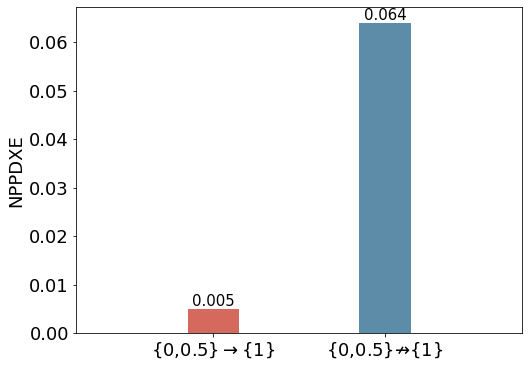

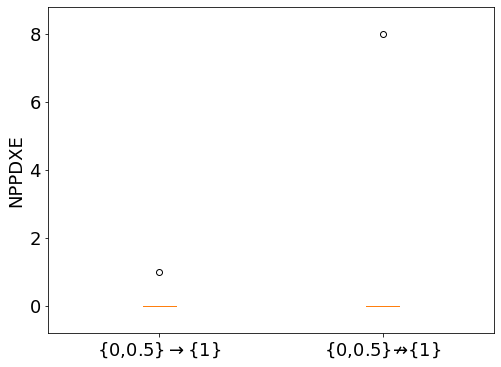

************************************************************************************************************************





Feature:  MARISTAT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.529030462482723, pvalue=0.21712681740959403)
Test: f_t, p_value_t -1.237E+00 2.171E-01
ANOVA: f, p_value: 1.529E+00 2.171E-01
--------------------------------------------------------------------------------




Chi-square test
Chi2: 6.464705016820962
p value: 0.26358869304631094
__________________________________________________


Group1:  [6 1 1 2 1 3 3 1 1 2 1 1 1 1 1 2 2 1 1 1 3 2 1 1 3 2 3 1 3 1 1 1 2 5 1 1 1
 2 1 1 1 1 2 1 5 1 3 1 2 1 1 1 1 2 1 1 1 3 1 2 1 5 1 1 1 3 1 6 1 2 1 3 2 2
 1 2 2 1 2 1 2 9 1 2 1 6 1 1 1 2 1 1 1 1 1 1 1 3 1 1 2 1 5 5 1 2 1 1 3 1 2
 1 2 1 1 1 3 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 6 2 1 2 1 2 3 1 1 2 1 2 1 1 1
 2 1 1 2 1 2 6 1 2 1 1 2 1 2 1 1 1 1 1 1 2 2 2 1 1 3 2 2 1 1 1 1 1 2 1 1 1
 1 2 5 2 1 1 2 2 2 3 

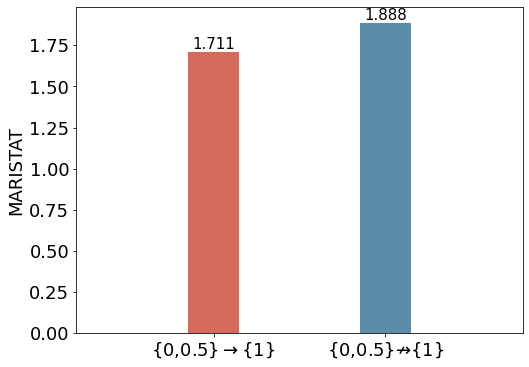

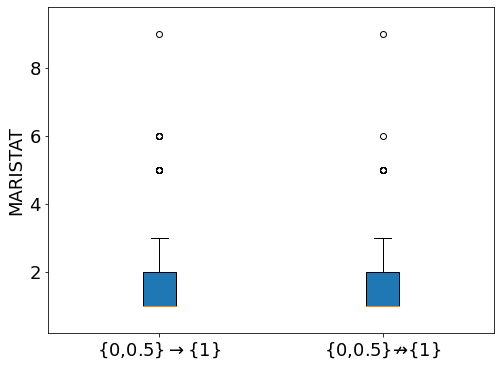

************************************************************************************************************************





Feature:  ORIENT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=6.51457740472654, pvalue=0.011143907907713961)
Test: f_t, p_value_t 1.458E+01 2.355E-36
ANOVA: f, p_value: 2.006E+02 2.355E-36
--------------------------------------------------------------------------------




Chi-square test
Chi2: 147.06062678614413
p value: 1.1344948455705398e-31
__________________________________________________


Group1:  [1.0 2.0 1.0 1.0 1.0 0.5 0.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 2.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 2.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.5 1.0
 1.0 1.0 1.0 0.5 1.0 0.0 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 2.0 1.0
 1.0 0.5 0.5 1.0 1.0 1.0 0.5 0.5 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 2.0 0.5
 1.0 1.0 0.5 0.5 1.0 1.0 0.5 1.0 2.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1

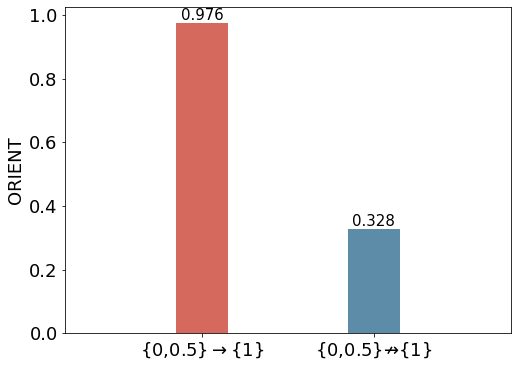

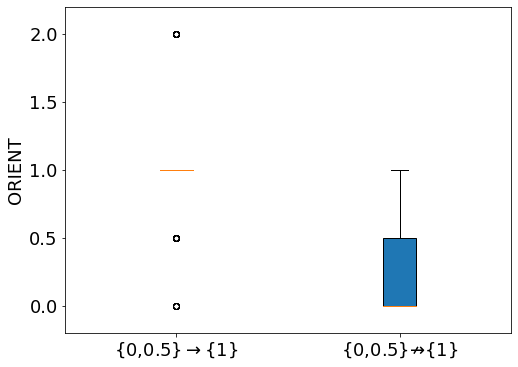

************************************************************************************************************************





Feature:  NACCPPA


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=109.34095956351956, pvalue=2.513588607224886e-22)
Test: f_t, p_value_t -8.135E+00 3.196E-13
ANOVA: f, p_value: 1.093E+02 3.196E-13
--------------------------------------------------------------------------------




Chi-square test
Chi2: 83.07797054266277
p value: 6.7091452801009144e-18
__________________________________________________


Group1:  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0

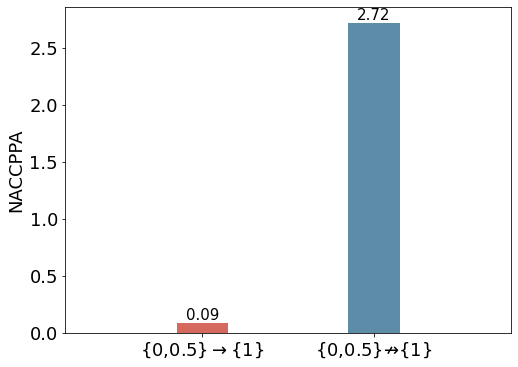

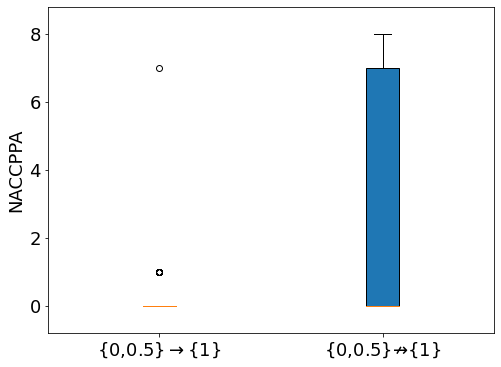

************************************************************************************************************************







In [7]:
group1_index=np.where(data_arr[:,-1]==True)[0]
group2_index=np.where(data_arr[:,-1]==False)[0]

for i in np.arange(used_number_features):
    feature_name=FS_data_used[i]
    
    print("Feature: ",feature_name)
    
    
    index_i=np.where(column_names_arr==feature_name)[0][0]
    get_data_i=data_arr[:,index_i]
    
    group1_data=get_data_i[group1_index]
    group2_data=get_data_i[group2_index]
    
    statistic_analysis(group1_data, group2_data)
    chi_test(group1_data,group2_data)
    
    print("Group1: ",group1_data)
    print("\n")
    print("Group2: ",group2_data)
    print("\n")
    print("Mean: ",np.mean(group1_data),np.mean(group2_data))
    print("Std: ",np.std(group1_data),np.std(group2_data))
    
    mean_bar(np.mean(group1_data),np.mean(group2_data),feature_name)
    
    bar_figure(group1_data,group2_data,feature_name)
    
    if feature_name=='NACCIDEM':
        draw_bar(group1_data,'True')
        draw_bar(group2_data,'False')
            
    
    print("*"*120)
    print("\n\n\n")
    
    
    print()